## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_IMP_PriceHistory_20250307.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-08,26441.468623,27088.354706,25794.582541,26684.050904,NaN,NaN,129300
2021-03-09,26684.050904,27088.354706,26320.177483,26481.899004,NaN,NaN,86800
2021-03-10,26522.329384,27088.354706,26279.747103,27088.354706,NaN,NaN,67400
2021-03-11,27169.215466,28301.266111,27088.354706,28301.266111,NaN,NaN,69800
2021-03-12,28301.266111,28301.266111,27492.658508,28099.114210,NaN,NaN,203400


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_IMP_FinancialIndicator_20250307.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,2.657096e+11,1.206097e+11,26.214092,783.134572,-0.2422,0.1504,0.1473,7.787092,0.256391,14175.273570
Q3/2024,2.087577e+11,7.240898e+10,24.365440,470.160800,-0.5278,0.1310,0.2007,5.981731,0.214184,13960.699247
Q2/2024,2.005735e+11,6.592342e+10,16.733002,428.049278,-0.6239,0.1343,0.2057,5.861987,0.207789,13490.538446
Q1/2024,1.805163e+11,6.192025e+10,14.909722,884.516238,-0.2423,0.1377,0.1523,7.567285,0.201852,30662.237766
Q4/2023,2.053529e+11,7.234942e+10,13.124383,1033.494565,-0.1274,0.1502,0.1478,7.767318,0.249275,29777.721528


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,46325.000000,2024-12-31
Q3/2024,49685.714286,2024-09-30
Q2/2024,34210.560515,2024-06-30
Q1/2024,30505.145010,2024-03-31
Q4/2023,26326.078024,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,1.239370e+11,4.185549e+10,18.615539,627.786245,-0.0197,0.1248,0.2326,5.300030,0.138491,26583.169753,29477.597648,NaN,NaN
Q2/2021,1.367019e+11,4.932450e+10,23.001322,739.813106,0.0426,0.1294,0.3138,4.186843,0.143847,25445.556237,31668.845772,2191.248124,0.074336
Q3/2021,8.918301e+10,3.131899e+10,22.610769,469.750312,-0.3846,0.1148,0.2458,5.067610,0.116957,25915.306550,30038.901802,-1629.943970,-0.051468
Q4/2021,1.381794e+11,6.659589e+10,25.890549,998.864858,-0.0537,0.1073,0.2788,4.586738,0.178318,26914.171408,31501.704103,1462.802302,0.048697
Q1/2022,1.426347e+11,5.260131e+10,27.148863,788.961551,0.2567,0.1104,0.1717,6.823244,0.140952,27703.132959,30873.359342,-628.344762,-0.019946


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,1.239370e+11,4.185549e+10,18.615539,627.786245,-0.0197,0.1248,0.2326,5.300030,0.138491,26583.169753,29477.597648,NaN,NaN
Q2/2021,1.367019e+11,4.932450e+10,23.001322,739.813106,0.0426,0.1294,0.3138,4.186843,0.143847,25445.556237,31668.845772,2191.248124,0.074336
Q3/2021,8.918301e+10,3.131899e+10,22.610769,469.750312,-0.3846,0.1148,0.2458,5.067610,0.116957,25915.306550,30038.901802,-1629.943970,-0.051468
Q4/2021,1.381794e+11,6.659589e+10,25.890549,998.864858,-0.0537,0.1073,0.2788,4.586738,0.178318,26914.171408,31501.704103,1462.802302,0.048697
Q1/2022,1.426347e+11,5.260131e+10,27.148863,788.961551,0.2567,0.1104,0.1717,6.823244,0.140952,27703.132959,30873.359342,-628.344762,-0.019946


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |       gross_profit |         net_income |    pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|-------------------:|-------------------:|------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |              16.00 |              16.00 | 16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 178,215,591,273.00 |  65,217,359,628.69 | 19.95 |   827.87 |         0.02 |  0.13 |       0.21 |            5.93 |             0.19 |    25,200.61 |   30,782.54 |       1,123.16 |         0.04 |
| std   |  47,421,132,544.75 |  20,498,607,245.82 |  4.69 |   248.39 |         0.39 |  0.02 |       0.05 |            1.14 |             0.04 |     5,794.72 |    7,539.40 |       5

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                         Variance |
|:---------------|---------------------------------:|
| gross_profit   | 2,248,763,811,827,001,065,472.00 |
| net_income     |   420,192,899,018,490,970,112.00 |
| pe             |                            21.96 |
| eps            |                        61,698.13 |
| eps_growth     |                             0.15 |
| roe            |                             0.00 |
| de_ratio       |                             0.00 |
| current_ratio  |                             1.30 |
| asset_turnover |                             0.00 |
| book_value     |                    33,578,815.12 |
| close_avg      |                    56,842,491.94 |
| price_change   |                    26,492,031.92 |
| pct_change     |                             0.03 |


### Vẽ biểu đồ biến động 

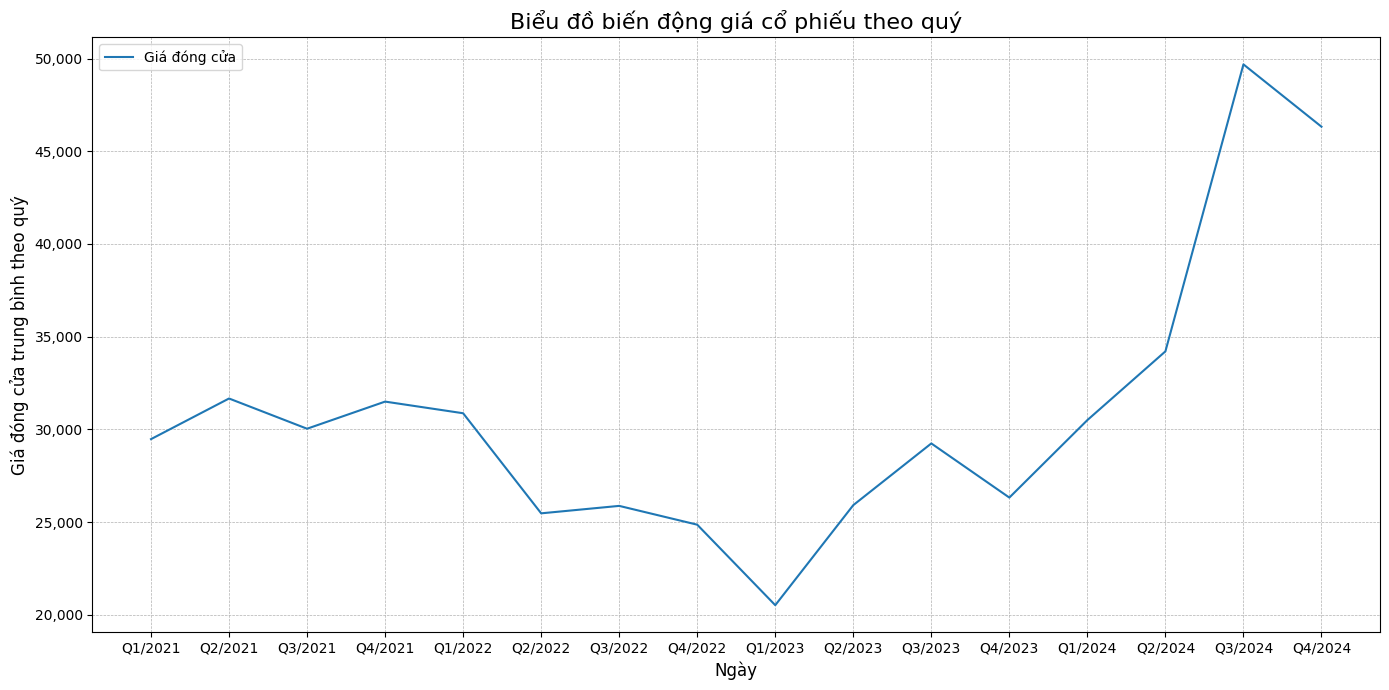

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

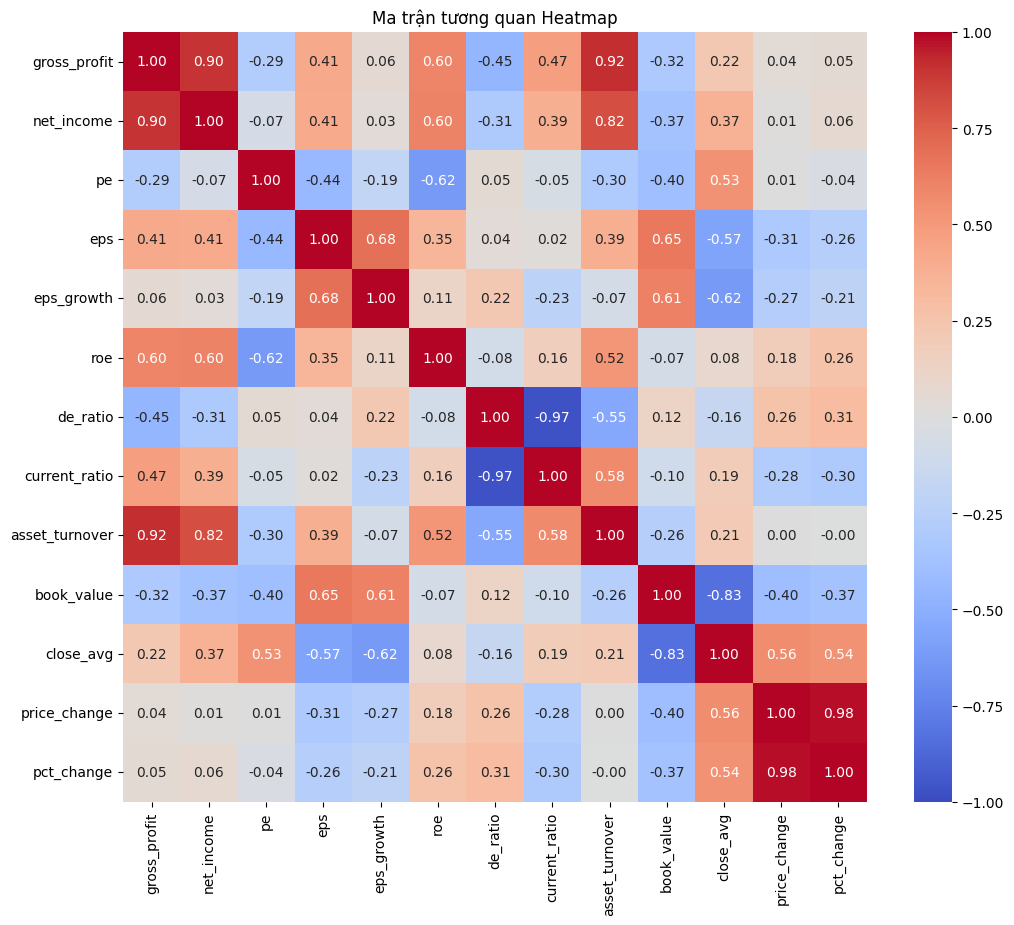

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
price_change      0.557853
pct_change        0.536710
pe                0.533016
net_income        0.373964
gross_profit      0.222863
asset_turnover    0.210873
current_ratio     0.191201
roe               0.083738
de_ratio         -0.157995
eps              -0.566394
eps_growth       -0.624953
book_value       -0.834928
Name: close_avg, dtype: float64

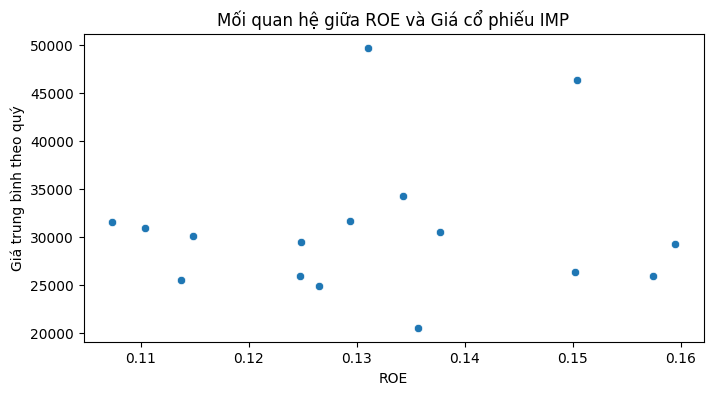

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu IMP')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()